# Regression

Basically, **Regression Analysis** allows us to discover if there’s a relationship between an independent variable/s and a dependent variable (the target). For example, in a **Simple Linear Regression** we want to know if there’s a relationship between x and y. This is very useful in forecasting (e.g. where is the trend going) and time series modelling (e.g. temperature levels by year and if global warming is true). 

## Simple Linear Regression 


For now, let’s see an example of a Simple Linear Regression wherein we analyze Salary Data (Salary_Data.csv). Here’s the dataset (comma-separated values and the columns are years, experience, and salary):

In [2]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

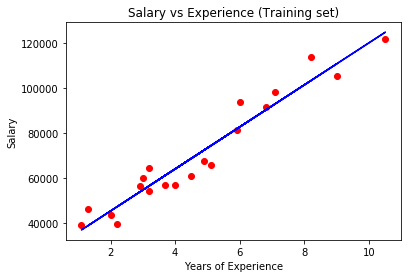

In [3]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

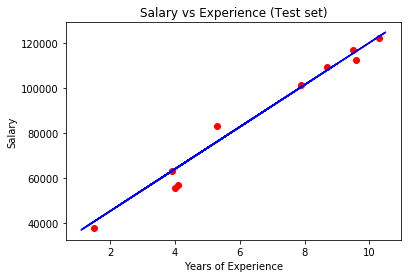

In [4]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show() 

The overall goal here is to create a model that will predict Salary based on Years of Experience. First, we create a model using the Training Set (70% of the dataset). It will then fit a line that is close as possible with most of the data points. After the line is created, we then apply that same line to the Test Set (the remaining 30% or 1/3 of the dataset).

## Multiple Linear Regression 


For example, let’s look at a dataset about 50 startups ((50_Startups.csv):

> R&D Spend,Administration,Marketing Spend,State,Profit
165349.2,136897.8,471784.1,New York,192261.83
162597.7,151377.59,443898.53,California,191792.06
153441.51,101145.55,407934.54,Florida,191050.39
144372.41,118671.85,383199.62,New York,182901.99
142107.34,91391.77,366168.42,Florida,166187.94
131876.9,99814.71,362861.36,New York,156991.12

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values 
dataset.head() 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Notice that there are multiple features or independent variables (R&D Spend, Administration, Marketing Spend, State). Again, the goal here is to reveal or discover a relationship between the independent variables and the target (Profit). 

Also notice that under the column ‘State’, the data is in text (not numbers). You’ll see New York, California, and Florida instead of numbers. How do you deal with this kind of data? One convenient way to do that is by transforming categorical data (New York, California, Florida) into numerical data. We can accomplish this if we use the following lines of code: 

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])  #Note this
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
X[:, 3]

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

What we did there is to transform the data in the fourth column (State). It’s number 3 because Python indexing starts at zero (0). The goal was to transform categorical variables data into something we can work on. To do this, we’ll create “dummy variables” which take the values of 0 or 1. In other words, they indicate the presence or absence of something. 

For example, we have the following data with categorical variables: 
- 3.5, New York 
- 2.0, California 
- 6.7, Florida 


If we use dummy variables,  the above data will be transformed into this: 

- 3.5, 1, 0, 0 
- 2.0, 0, 1, 0 
- 6.7, 0, 0, 1

As mentioned earlier, dummy variables indicate the presence or absence of something. They are commonly used as “substitute variables” so we can do a quantitative analysis on qualitative data. From the new table above we can quickly see that 3.5 is for New York (1 New York, 0 California, and 0 Florida). It’s a convenient way of representing categories into numeric values. 

However, there’s this so-called “dummy variable trap” wherein there’s an extra variable that could have been removed because it can be predicted from the others. In our example above, notice that when the columns for New York and California are zero (0), automatically you’ll know it’s Florida. You can already know which State it is even with just the 2 variable. 

Continuing with our work on 50_Startups.csv, we can avoid the dummy variable trap by including this in our code: 
 $X = X[:, 1:] $

In [14]:
X=X[:,1:]

Now we’re all set to dividing the dataset into Training Set and Test Set. We can do this with the following lines of code: 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

80% Training Set, 20% Test Set. Next step is we can then create a regressor and “fit the line” (and use that line on Test Set): 

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test) 
y_pred

array([103015.20159796, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221056, 116161.24230166,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569551])

In [10]:
regressor.score(X_test,y_test)

0.9347068473282446

# Decision Tree 

The Regression method discussed so far is very good if there’s a linear relationship between the independent variables and the target. But what if there’s no linearity (but the dependent variables can still be used to predict the target)? 

This is where other methods such as **Decision Tree Regression** comes in. Note that it sounds different from **Simple Linear Regression** and **Multiple Linear Regression**. There’s no linearity and it works differently. Decision Tree Regression works by breaking down the dataset into smaller and smaller subsets. Here’s an illustration that better explains it: 

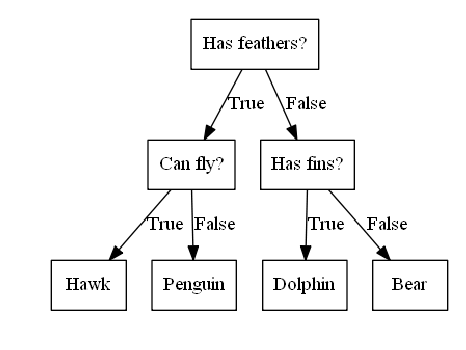

In [15]:
import mglearn
plt.figure(figsize=(6,4),dpi=100)
mglearn.plots.plot_animal_tree()

Instead of plotting and fitting a line, there are decision nodes and leaf nodes. Let’s quickly look at an example to see how it works (using Position_Salaries.csv): 

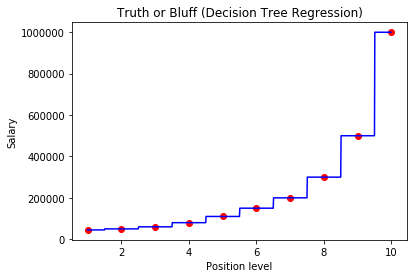

In [12]:
# Decision Tree Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict(6.5)

# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Notice that there’s no linear relationship between the Position Level and the Salary. Instead, it’s somewhat a step-wise result. We can still see the relationship between Position Level and Salary, but it’s expressed in different terms (seemingly non-straightforward approach).

## Random Forest 


As discussed earlier, Decision Tree Regression can be good to use when there’s not much linearity between an independent variable and a target. However, this approach uses the dataset once to come up with results. That’s because in many cases, it’s always good to get different results from different approaches (e.g. many decision trees) and then averaging those results. 

To solve this, many data scientists use Random Forest Regression. This is simply a collection or ensemble of different decision trees wherein random different subsets are used and then the results are averaged. It’s like creating decision trees again and again and then getting the results of each. 

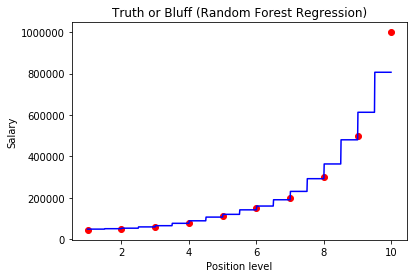

In [13]:
# Random Forest Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict(6.5)

# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show() 

Notice that it’s a lot similar to the Decision Tree Regression earlier. After all, Random Forest (from the term itself) is a collection of “trees.” If there’s not much deviation in our dataset, the result should look almost the same. Let’s compare them for easy visualization: 

Many data scientists prefer Random Forest because it averages results which can effectively reduce errors. Looking at the code it seems straightforward and simple. But behind the scenes there are complex algorithms at play. It’s sort of a black box wherein there’s an input, there’s a black box and there’s the result. We have not much idea about what happens inside the black box (although we can still find out if we dig through the mathematics). We’ll encounter this again and again as we discuss more about data analysis and machine learning. 